Optimizing agroforestry for climate resilience: A data-driven approach to mitigating environmental shocks and enhancing ecosystem stability

A file selection dialog will open, allowing you to choose the file from your computer.

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Central.xlsx to Central.xlsx
Saving LowerNyanza.xlsx to LowerNyanza.xlsx


You can check the names of the uploaded

In [3]:
print(uploaded.keys())

dict_keys(['Central.xlsx', 'LowerNyanza.xlsx'])


In [4]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read the two files
df1 = pd.read_excel(io.BytesIO(uploaded['Central.xlsx']))
df2 = pd.read_excel(io.BytesIO(uploaded['LowerNyanza.xlsx']))

In [6]:
# Concatenate the DataFrames
# You can use axis=0 to concatenate them vertically (adding rows)
# and axis=1 to concatenate them horizontally (adding columns)
agf_kenya = pd.concat([df1, df2], axis=0)

In [7]:
agf_kenya.head()

,SubmissionDate,start,end,Enumerator,date,Type_of_agroforestry,plant_name_Common_Name,plant_name_Genus,plant_name_Species,is_it_new_species,...,gps-Accuracy,comments,__version__,_version_,meta-instanceID,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected
0,2024-08-31T15:41:38.375Z,2024-08-31T16:41:54.964+03:00,2024-08-31T16:43:21.481+03:00,henry_oindi,45535,pasture_agroforestry,Harrisonia,Harrisonia,abbyssinica 1,no,...,4.20,NaN,v4kBPjrPD6gWYgj7woobrZ,v7rXPKjiN2BA8eE6GQgXx3,uuid:ddd6861d-a134-4000-a78b-c5c5982659f0,uuid:ddd6861d-a134-4000-a78b-c5c5982659f0,616,Lacuna Data Collectors,5,5
1,2024-08-24T19:49:05.413Z,2024-08-24T18:15:11.153+03:00,2024-08-24T18:50:50.369+03:00,henry_oindi,45528,cropland_agroforestry,Red poker tree,Erythrina,abbyssinica,no,...,4.98,NaN,v4kBPjrPD6gWYgj7woobrZ,v7rXPKjiN2BA8eE6GQgXx3,uuid:1745d946-1880-4050-9e4e-c022cb6b7e5d,uuid:1745d946-1880-4050-9e4e-c022cb6b7e5d,616,Lacuna Data Collectors,5,5
2,2024-08-30T18:49:29.314Z,2024-08-30T13:58:07.544+03:00,2024-08-30T14:00:01.965+03:00,henry_oindi,45534,cropland_agroforestry,Red poker tree,Erythrina,abbyssinica,no,...,4.56,NaN,v4kBPjrPD6gWYgj7woobrZ,v7rXPKjiN2BA8eE6GQgXx3,uuid:844ad023-18e5-48cd-9f4f-159e753e7f90,uuid:844ad023-18e5-48cd-9f4f-159e753e7f90,616,Lacuna Data Collectors,5,5
3,2024-08-24T19:53:23.832Z,2024-08-24T18:13:02.042+03:00,2024-08-24T18:17:12.397+03:00,sarah_mwangi,45528,cropland_agroforestry,Red poker tree,Erythrina,abbyssinica,no,...,3.50,NaN,v4kBPjrPD6gWYgj7woobrZ,v7rXPKjiN2BA8eE6GQgXx3,uuid:40e7e06f-65d1-4e47-9b45-7dde9c4776ae,uuid:40e7e06f-65d1-4e47-9b45-7dde9c4776ae,616,Lacuna Data Collectors,5,5
4,2024-08-30T18:49:33.220Z,2024-08-30T14:00:33.100+03:00,2024-08-30T14:02:12.370+03:00,henry_oindi,45534,cropland_agroforestry,Red poker tree,Erythrina,abbyssinica,no,...,5.00,NaN,v4kBPjrPD6gWYgj7woobrZ,v7rXPKjiN2BA8eE6GQgXx3,uuid:60b34824-7f72-451f-9c70-dd426b14c817,uuid:60b34824-7f72-451f-9c70-dd426b14c817,616,Lacuna Data Collectors,5,5


In [8]:
duplicate_count = agf_kenya.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 3187


In [9]:
# remove dublicates
agf_kenya = agf_kenya.drop_duplicates()

In [10]:
agf_kenya.columns

Index(['SubmissionDate', 'start', 'end', 'Enumerator', 'date',
       'Type_of_agroforestry', 'plant_name_Common_Name', 'plant_name_Genus',
       'plant_name_Species', 'is_it_new_species', 'plant_measurements-DBH',
       'plant_measurements-Height', 'plant_measurements-Canopy_Diameter',
       'photo-Whole_Tree', 'photo-Canopy', 'photo-Flowers', 'photo-Fruits',
       'photo-Trunk', 'external_gps_number', 'gps-Latitude', 'gps-Longitude',
       'gps-Altitude', 'gps-Accuracy', 'comments', '__version__', '_version_',
       'meta-instanceID', 'KEY', 'SubmitterID', 'SubmitterName',
       'AttachmentsPresent', 'AttachmentsExpected'],
      dtype='object')

In [11]:
agf_kenya.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 4595 entries, 0 to 4416
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SubmissionDate                      4595 non-null   object 
 1   start                               4595 non-null   object 
 2   end                                 4595 non-null   object 
 3   Enumerator                          4595 non-null   object 
 4   date                                4595 non-null   int64  
 5   Type_of_agroforestry                4595 non-null   object 
 6   plant_name_Common_Name              4595 non-null   object 
 7   plant_name_Genus                    4595 non-null   object 
 8   plant_name_Species                  4595 non-null   object 
 9   is_it_new_species                   4595 non-null   object 
 10  plant_measurements-DBH              4595 non-null   int64  
 11  plant_measurements-Height           4595 non-nul

In [12]:
# Convert the dates columms to datetime format
agf_kenya['SubmissionDate'] = pd.to_datetime(agf_kenya['SubmissionDate'], utc=True)
agf_kenya['start'] = pd.to_datetime(agf_kenya['start'])
agf_kenya['end'] = pd.to_datetime(agf_kenya['end'])

In [13]:
#Extract date and time up to seconds
agf_kenya['SubmissionDate_Date'] = agf_kenya['SubmissionDate'].dt.date
agf_kenya['SubmissionDate_Time'] = agf_kenya['SubmissionDate'].dt.strftime('%H:%M:%S')
agf_kenya['Start_Date'] = agf_kenya['start'].dt.date
agf_kenya['Start_Time'] = agf_kenya['start'].dt.strftime('%H:%M:%S')
agf_kenya['End_Date'] = agf_kenya['end'].dt.date
agf_kenya['End_Time'] = agf_kenya['end'].dt.strftime('%H:%M:%S')

In [14]:
# Check if start and end dates are the same before calculating duration
agf_kenya['Same_Day'] = agf_kenya['Start_Date'] == agf_kenya['End_Date']


In [15]:
#Check those that were started and completed on a different day
agf_kenya["Same_Day"].value_counts()
#agf_kenya["Same_Day"].value_counts().plot(kind='bar')

,count
Same_Day,
True,4545
False,50


In [16]:
# agf_kenya['Duration'] = agf_kenya.apply(lambda row: row['end'] - row['start'] if row['Same_Day'] else None, axis=1)
# # Calculate Duration only for valid rows
agf_kenya['Duration'] = agf_kenya.apply(
    lambda row: (row['end'] - row['start']).total_seconds() / 60 if row['Same_Day'] and pd.notnull(row['start']) and pd.notnull(row['end']) else None,
    axis=1
)

In [17]:
agf_kenya.head()

,SubmissionDate,start,end,Enumerator,date,Type_of_agroforestry,plant_name_Common_Name,plant_name_Genus,plant_name_Species,is_it_new_species,...,AttachmentsPresent,AttachmentsExpected,SubmissionDate_Date,SubmissionDate_Time,Start_Date,Start_Time,End_Date,End_Time,Same_Day,Duration
0,2024-08-31 15:41:38.375000+00:00,2024-08-31 16:41:54.964000+03:00,2024-08-31 16:43:21.481000+03:00,henry_oindi,45535,pasture_agroforestry,Harrisonia,Harrisonia,abbyssinica 1,no,...,5,5,2024-08-31,15:41:38,2024-08-31,16:41:54,2024-08-31,16:43:21,True,1.441950
1,2024-08-24 19:49:05.413000+00:00,2024-08-24 18:15:11.153000+03:00,2024-08-24 18:50:50.369000+03:00,henry_oindi,45528,cropland_agroforestry,Red poker tree,Erythrina,abbyssinica,no,...,5,5,2024-08-24,19:49:05,2024-08-24,18:15:11,2024-08-24,18:50:50,True,35.653600
2,2024-08-30 18:49:29.314000+00:00,2024-08-30 13:58:07.544000+03:00,2024-08-30 14:00:01.965000+03:00,henry_oindi,45534,cropland_agroforestry,Red poker tree,Erythrina,abbyssinica,no,...,5,5,2024-08-30,18:49:29,2024-08-30,13:58:07,2024-08-30,14:00:01,True,1.907017
3,2024-08-24 19:53:23.832000+00:00,2024-08-24 18:13:02.042000+03:00,2024-08-24 18:17:12.397000+03:00,sarah_mwangi,45528,cropland_agroforestry,Red poker tree,Erythrina,abbyssinica,no,...,5,5,2024-08-24,19:53:23,2024-08-24,18:13:02,2024-08-24,18:17:12,True,4.172583
4,2024-08-30 18:49:33.220000+00:00,2024-08-30 14:00:33.100000+03:00,2024-08-30 14:02:12.370000+03:00,henry_oindi,45534,cropland_agroforestry,Red poker tree,Erythrina,abbyssinica,no,...,5,5,2024-08-30,18:49:33,2024-08-30,14:00:33,2024-08-30,14:02:12,True,1.654500


In [18]:
agf_kenya["Enumerator"].value_counts()

,count
Enumerator,
sarah_mwangi,1243
henry_oindi,921
judy_akinyi,715
juliet_onditi,674
david_makori,526
roy_spenser,516


In [19]:
agf_kenya.groupby ('Same_Day')['Enumerator'].value_counts()

Same_Day  Enumerator   
False     juliet_onditi      24
          sarah_mwangi       16
          judy_akinyi         6
          henry_oindi         3
          david_makori        1
True      sarah_mwangi     1227
          henry_oindi       918
          judy_akinyi       709
          juliet_onditi     650
          david_makori      525
          roy_spenser       516
Name: count, dtype: int64

In [20]:
agf_kenya["Duration"].describe()

,Duration
count,4545.000000
mean,4.064160
std,14.959764
min,1.052700
25%,1.749833
50%,2.129033
75%,2.789450
max,476.645717


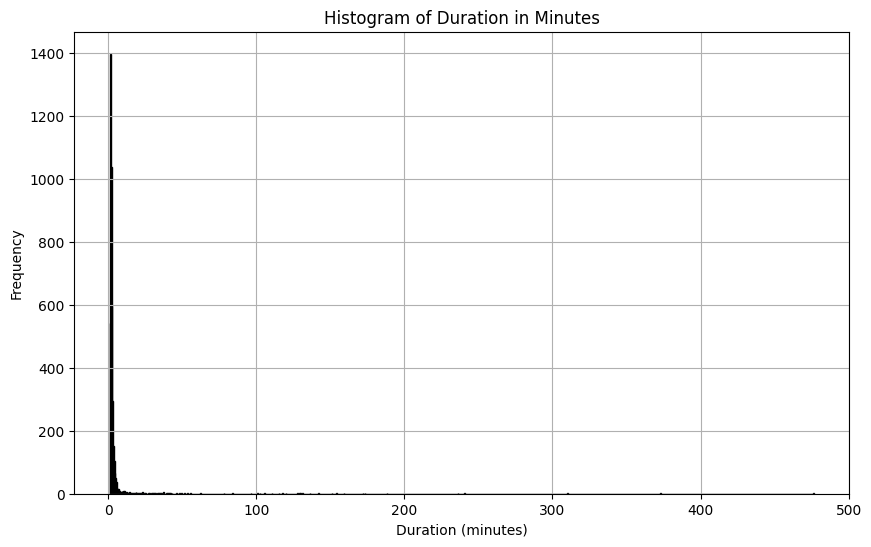

In [21]:
plt.figure(figsize=(10, 6))  # Optional: Set figure size
agf_kenya['Duration'].plot(kind='hist', bins=1000, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Duration in Minutes')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [22]:
# Create a table with value counts and add a total row
table_df = agf_kenya["Type_of_agroforestry"].value_counts().reset_index()
table_df.columns = ["Type_of_agroforestry", "Counts"]
table_df.loc[len(table_df)] = ["Total", table_df["Counts"].sum()]
table_df


,Type_of_agroforestry,Counts
0,cropland_agroforestry,2569
1,pasture_agroforestry,1330
2,natural_forest_agroforestry,696
3,Total,4595


<Axes: ylabel='Type_of_agroforestry'>

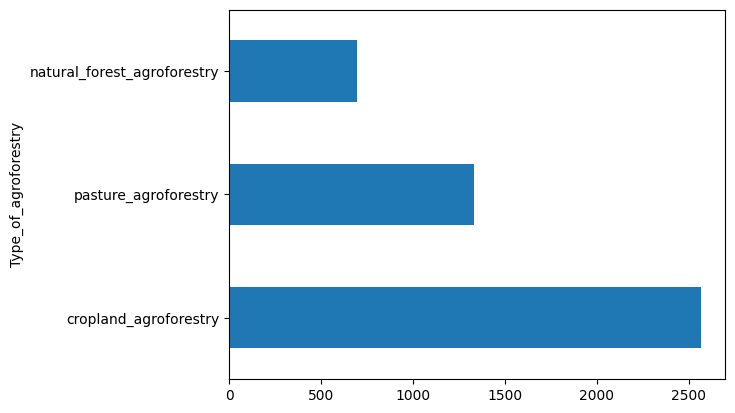

In [23]:
agf_kenya["Type_of_agroforestry"].value_counts().plot(kind="barh")

In [24]:
# Group, count, and reset index
agf_kenya.groupby("plant_name_Species")["plant_name_Genus"].value_counts()

plant_name_Species  plant_name_Genus
Papaya              Carica               4
Pennsylvanica       Prunus               1
abbyssinica         Erythrina            4
                    Erythrina            4
abbyssinica 1       Harrisonia           1
                                        ..
volubilis           Hippocratea          1
xanthophloea        Acacia              26
xanthophloea        Acacia              87
zeyheri             Combretum           38
zixyphifolius       Agelanthus           1
Name: count, Length: 268, dtype: int64

In [25]:
# Group by plant name Genus and perform aggregation
Plant_Genus = agf_kenya.groupby('plant_name_Genus').agg({
    'plant_name_Species': lambda x: x.value_counts().to_dict()  # Count species occurrences per genus
})
# Calculate total counts for each genus
totals = agf_kenya['plant_name_Genus'].value_counts()
# Combine grouped data with totals in a new DataFrame
Plant_Genus['Total_Species_Count'] = totals
Plant_Genus

,plant_name_Species,Total_Species_Count
plant_name_Genus,,
Acacia,"{'tortilis': 268, 'mearnsii': 98, 'drepanolobi...",750
Achyranthes,{'aspera': 1},1
Acokanthera,"{'oblongifolia': 2, 'schimperi': 1}",3
Acokanthera,"{'oblongifolia': 3, 'schimperi ': 3}",6
Afrocarpus,{'grasilior': 7},7
...,...,...
Vernonia,{'amygdalina': 1},1
Warbugia,"{'ugandensis': 3, 'salutaris': 2, 'salutaris '...",6
Warbugia,{'ugandensis ': 1},1


In [26]:
# Export Plant Genus to a CSV file
Plant_Genus.to_csv('grouped_plant_data.csv', index=True)
print("Data has been grouped, totals added, and saved as 'grouped_plant_data.csv'.")

Data has been grouped, totals added, and saved as 'grouped_plant_data.csv'.


In [27]:
agf_kenya[['plant_measurements-DBH','plant_measurements-Height', 'plant_measurements-Canopy_Diameter' ]].describe()

,plant_measurements-DBH,plant_measurements-Height,plant_measurements-Canopy_Diameter
count,4595.000000,4595.000000,4595.000000
mean,81.112514,781.628074,440.314516
std,375.470841,1108.278603,1169.995196
min,1.000000,0.000000,0.000000
25%,20.000000,350.000000,130.000000
50%,35.000000,630.000000,300.000000
75%,60.000000,965.000000,500.000000
max,12000.000000,40000.000000,40000.000000


In [28]:
agf_kenya[['plant_measurements-DBH','plant_measurements-Height', 'plant_measurements-Canopy_Diameter' ]].corr()

,plant_measurements-DBH,plant_measurements-Height,plant_measurements-Canopy_Diameter
plant_measurements-DBH,1.000000,0.038056,0.326392
plant_measurements-Height,0.038056,1.000000,0.035758
plant_measurements-Canopy_Diameter,0.326392,0.035758,1.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
agf_kenya.to_csv('/content/drive/My Drive/agf_kenya_clean.csv', index=False) #replace agf_kenya.csv with desired filename